In [1]:
# ------- Start of the project -------#
# ------- Visualizing the spread of CoronaVirus in six countries using python --------#

# Author:- Ashutosh Deshwal 
# Email:- deshwalashutosh2098@gmail.com
# Website :- www.ashutoshdeshwal.com

#Step 1 :- Import useful libraries for the project

%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from time import sleep

In [2]:
# Step 2:- Download the data Set
URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df = pd.read_csv(URL_DATASET, usecols = ['Date', 'Country', 'Confirmed'])

# to see the information about data set, run following command
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34968 entries, 0 to 34967
Data columns (total 3 columns):
Date         34968 non-null object
Country      34968 non-null object
Confirmed    34968 non-null int64
dtypes: int64(1), object(2)
memory usage: 819.7+ KB
None


In [3]:
# Step 3 :- Create a list containing of all the dates
list_of_dates = df['Date'].unique()

# To see the dates, run the following commands
print(list_of_dates) 

['2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25' '2020-01-26'
 '2020-01-27' '2020-01-28' '2020-01-29' '2020-01-30' '2020-01-31'
 '2020-02-01' '2020-02-02' '2020-02-03' '2020-02-04' '2020-02-05'
 '2020-02-06' '2020-02-07' '2020-02-08' '2020-02-09' '2020-02-10'
 '2020-02-11' '2020-02-12' '2020-02-13' '2020-02-14' '2020-02-15'
 '2020-02-16' '2020-02-17' '2020-02-18' '2020-02-19' '2020-02-20'
 '2020-02-21' '2020-02-22' '2020-02-23' '2020-02-24' '2020-02-25'
 '2020-02-26' '2020-02-27' '2020-02-28' '2020-02-29' '2020-03-01'
 '2020-03-02' '2020-03-03' '2020-03-04' '2020-03-05' '2020-03-06'
 '2020-03-07' '2020-03-08' '2020-03-09' '2020-03-10' '2020-03-11'
 '2020-03-12' '2020-03-13' '2020-03-14' '2020-03-15' '2020-03-16'
 '2020-03-17' '2020-03-18' '2020-03-19' '2020-03-20' '2020-03-21'
 '2020-03-22' '2020-03-23' '2020-03-24' '2020-03-25' '2020-03-26'
 '2020-03-27' '2020-03-28' '2020-03-29' '2020-03-30' '2020-03-31'
 '2020-04-01' '2020-04-02' '2020-04-03' '2020-04-04' '2020-04-05'
 '2020-04-

<IPython.core.display.Javascript object>


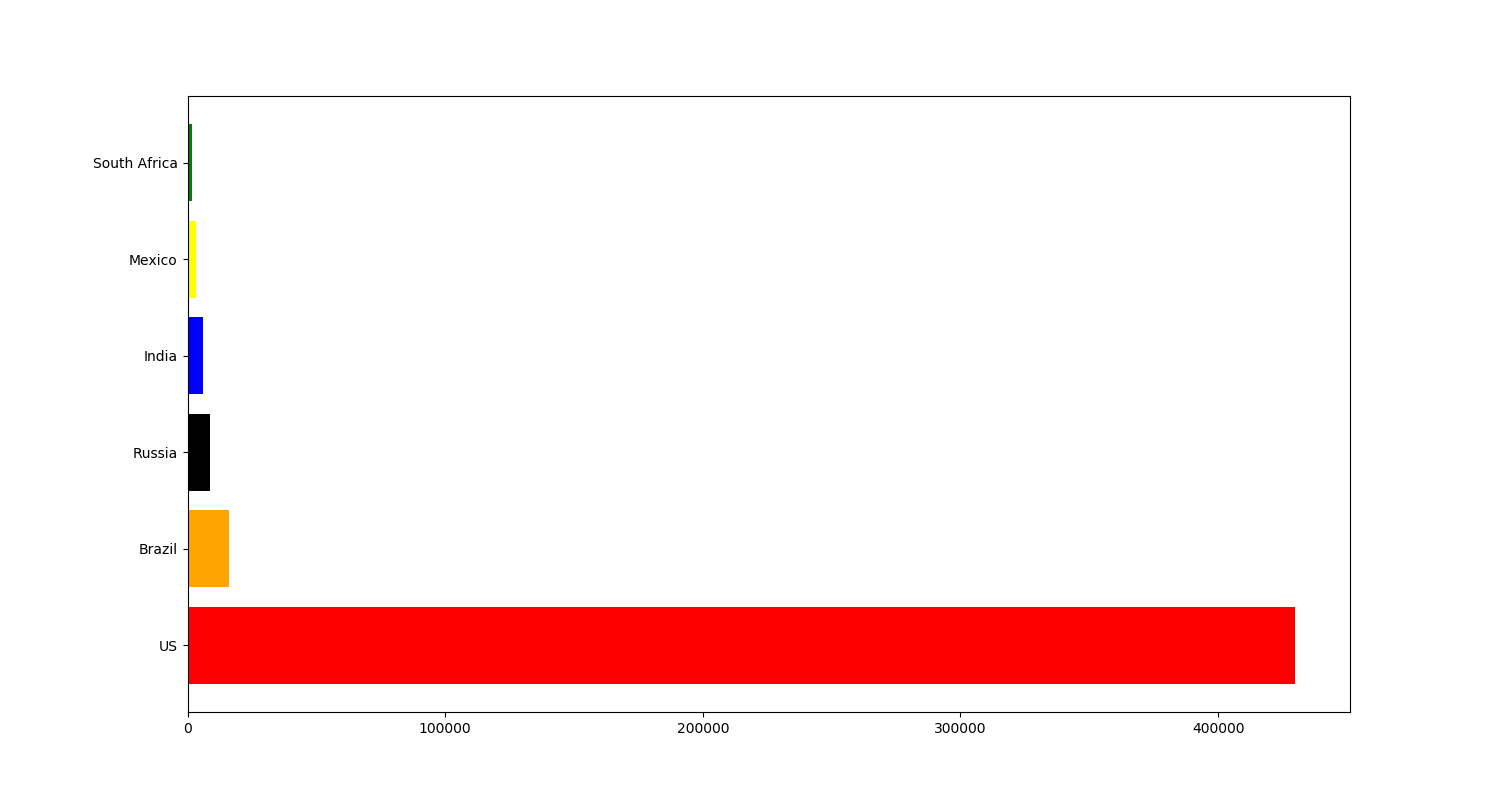

In [4]:
# Step 4 :- Pick some countries about which you want to focus. 
# Also create an ax object

fig, ax = plt.subplots(figsize=(15, 8))

# Where the virus is spreading a lot, we will animate only for those six countries.

list_of_countries = ['US', 'Brazil', 'India', 'Russia', 'South Africa', 'Mexico']

# List of colors for the 6 horizontal bars are as follows

list_of_colors = ['red', 'orange', 'black', 'blue', 'yellow', 'green']

In [5]:
# Step 5 :- Write the call back (plot_bar_graph) function which will used in the FuncAnimation class object

def plot_bar_graph(some_date):
    df3 = df[df['Date'].eq(some_date)]
    ax.clear()
    
    # Only take Confirmed column in descending order
    df4 = df3.sort_values(by = 'Confirmed', ascending = False)
    
    # Select the top 6 Confirmed countries
    df4 = df4[df4['Country'].isin(list_of_countries)]
    
    sleep(0.3)  # used to slow down the animation
    
    return ax.barh(df4['Country'], df4['Confirmed'], color= list_of_colors)

In [6]:
# Step 6 :- Now create a FuncAnimation object
covid_animation = animation.FuncAnimation(fig = fig, func = plot_bar_graph,
                    frames= list_of_dates, blit=True,
                    interval=20)

In [7]:
# Step 7 :- Finally save the animation to a video file of mp4 format

# Set the path where you want to save the video file.

my_path = r'C:\Users\lenovo\Desktop\covid_visualization.mp4'  

covid_animation.save(filename = my_path, writer = 'ffmpeg', fps=30,
                     extra_args= ['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
plt.show()

# -------- End of the project -------#